In [1]:
import pandas as pd
from preprocess import Audio_Processor
from data_utils import enumerate_strings

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.svm import SVC

from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

Using TensorFlow backend.


Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.


/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
SR = 16000

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Styling
import seaborn as sns
sns.set(style="whitegrid")

# Setup

In [4]:
path_to_db='../ESC-50/'
ps = Audio_Processor(path_to_db + 'audio/', sr=SR)
dataset = pd.read_csv(path_to_db + 'meta/esc50.csv')
classes = [None] * 50
h_classes = ['Human & Animal', 'Interacting Materials']
mapping = {
    'dog': 0,
    'rooster': 0,
    'pig': 0,
    'cow': 0,
    'frog': 0,
    'cat': 0,
    'hen': 0,
    'insects': 0,
    'sheep': 0,
    'crow': 0,
    'rain': 1,
    'sea_waves': 1,
    'crackling_fire': 1,
    'crickets': 0,
    'chirping_birds': 0,
    'water_drops': 1,
    'wind': 1,
    'pouring_water': 1,
    'toilet_flush': 1,
    'thunderstorm': 1,
    'crying_baby': 0,
    'sneezing': 0,
    'clapping': 1,
    'breathing': 0,
    'coughing': 0,
    'footsteps': 1,
    'laughing': 0,
    'brushing_teeth': 1,
    'snoring': 0,
    'drinking_sipping': 1,
    'door_wood_knock': 1,
    'mouse_click': 1,
    'keyboard_typing': 1,
    'door_wood_creaks': 1,
    'can_opening': 1,
    'washing_machine': 1,
    'vacuum_cleaner': 1,
    'clock_alarm': 1,
    'clock_tick': 1,
    'glass_breaking':1,
    'helicopter': 1,
    'chainsaw': 1,
    'siren': 1,
    'car_horn': 1,
    'engine': 1,
    'train': 1,
    'church_bells': 1,
    'airplane': 1,
    'fireworks': 1,
    'hand_saw': 1,
}
dataset['h_target'] = None
for index, row in dataset.iterrows():
    target = row['target']
    classes[target] = row['category']
    dataset.loc[index, 'h_target'] = mapping[row['category']]

In [ ]:
block_tries = {
    "blocksize": [int(SR/4), int(SR/2), int(SR), int(SR * 2), int(SR * 5)],
    "overlap": [int(SR/8), int(SR/4), int(SR/2), int(SR), 0]
              }

In [ ]:
scores = []
for i in range(len(block_tries['blocksize'])):
    df = ps.preprocess_fold(dataset,
                           kind='mfcc',
                           blocksize=block_tries['blocksize'][i],
                           overlap=block_tries['overlap'][i])

    X = df.drop(['target', 'h_target'], axis=1)
    y = df['h_target']
    clf = make_pipeline(
        MinMaxScaler(),
        SVC()
    )
    scores.append(
        pd.DataFrame(
            cross_validate(clf, 
                           X, y, 
                           scoring=['accuracy', 'f1', 'recall', 'precision', 'roc_auc'], 
                           cv=10,
                           n_jobs=-1,
                           verbose=2
                          )
        ))
    scores[-1]['blocksize'] = block_tries['blocksize'][i]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 56 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed: 112.7min remaining: 48.3min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 113.9min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 56 concurrent workers.


In [14]:
res_df = pd.concat(scores, ignore_index=True)
res_df['Window Size (s)'] = res_df['blocksize'] / SR

In [41]:
res_df

,fit_time,score_time,test_accuracy,test_f1,test_precision,test_recall,test_roc_auc,train_accuracy,train_f1,train_precision,train_recall,train_roc_auc,blocksize,Window Size (s)
0,5062.649456,169.246449,0.677184,0.807525,0.677184,1.0,0.725211,0.677197,0.807534,0.677197,1.0,0.736944,4000,0.25
1,4946.746764,165.931522,0.677184,0.807525,0.677184,1.0,0.641384,0.677197,0.807534,0.677197,1.0,0.737614,4000,0.25
2,5091.168051,165.976794,0.677184,0.807525,0.677184,1.0,0.720775,0.677197,0.807534,0.677197,1.0,0.740675,4000,0.25
3,4985.521168,166.645330,0.677184,0.807525,0.677184,1.0,0.698420,0.677197,0.807534,0.677197,1.0,0.739013,4000,0.25
4,5022.430625,167.508307,0.677184,0.807525,0.677184,1.0,0.670293,0.677197,0.807534,0.677197,1.0,0.735551,4000,0.25
5,5026.570808,167.109446,0.677184,0.807525,0.677184,1.0,0.753648,0.677197,0.807534,0.677197,1.0,0.739765,4000,0.25
6,4950.524744,168.410618,0.677184,0.807525,0.677184,1.0,0.713614,0.677197,0.807534,0.677197,1.0,0.740471,4000,0.25
7,4976.074539,168.049648,0.677184,0.807525,0.677184,1.0,0.686866,0.677197,0.807534,0.677197,1.0,0.735763,4000,0.25
8,5089.771071,169.264039,0.677184,0.807525,0.677184,1.0,0.724881,0.677197,0.807534,0.677197,1.0,0.744707,4000,0.25
9,4990.281572,166.315302,0.677304,0.807611,0.677304,1.0,0.711860,0.677184,0.807525,0.677184,1.0,0.738268,4000,0.25


In [51]:
gb = res_df[
    ['Window Size (s)', 'test_roc_auc', 'fit_time', 'score_time']
].groupby(['Window Size (s)'])

means = gb.mean()
errors = gb.std()

means.columns = ['Test Set ROC AUC Score', 'Fit Time (s)', 'Score Time (s)']
errors.columns = ['Test Set ROC AUC Score', 'Fit Time (s)', 'Score Time (s)']

In [52]:
means

,Test Set ROC AUC Score,Fit Time (s),Score Time (s)
Window Size (s),,,
0.25,0.704695,5014.173880,167.445746
0.50,0.694606,173.623040,52.450925
1.00,0.683064,69.053235,20.974475
2.00,0.667493,34.993031,12.219027
5.00,0.638801,31.795632,8.741095


In [53]:
errors

,Test Set ROC AUC Score,Fit Time (s),Score Time (s)
Window Size (s),,,
0.25,0.031908,53.391411,1.261862
0.50,0.037428,13.677143,2.403817
1.00,0.039314,6.494240,0.892474
2.00,0.044550,1.918001,0.924385
5.00,0.041633,1.423779,0.662970


Text(0, 0.5, 'Score Time (s)')

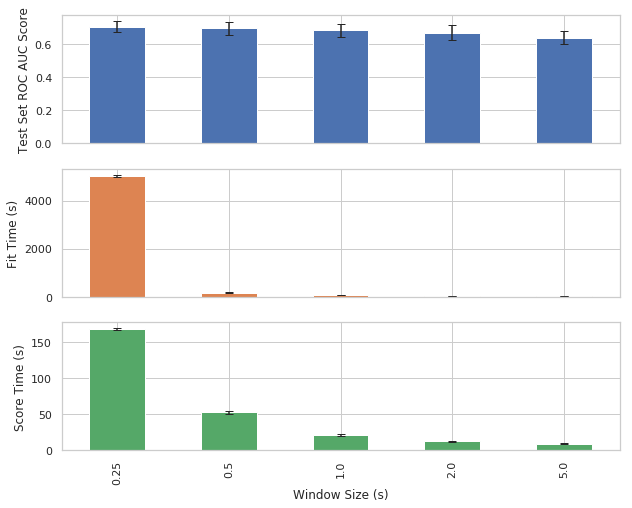

In [59]:
ax = means.plot(yerr=errors, figsize=(10,8), kind='bar', subplots=True, legend=False, title=["","",""], capsize=4)
ax[0].set_ylabel('Test Set ROC AUC Score')
ax[1].set_ylabel('Fit Time (s)')
ax[2].set_ylabel('Score Time (s)')